### Introduction to `pytorch`



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Below, a dataset containing information about vehicles is loaded and the `Horsepower` feature is assigned as `X` and `MPG` is assigned as `y`.  This is a regression problem, and we are using the horsepower of a vehicle to predict miles per gallon.

In [3]:
url = 'https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/auto-mpg.csv'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year']

raw_dataset = pd.read_csv(url, names = column_names, skiprows=1)

In [4]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [5]:
X = raw_dataset['Horsepower']
y = raw_dataset['MPG']

<Axes: xlabel='Horsepower', ylabel='MPG'>

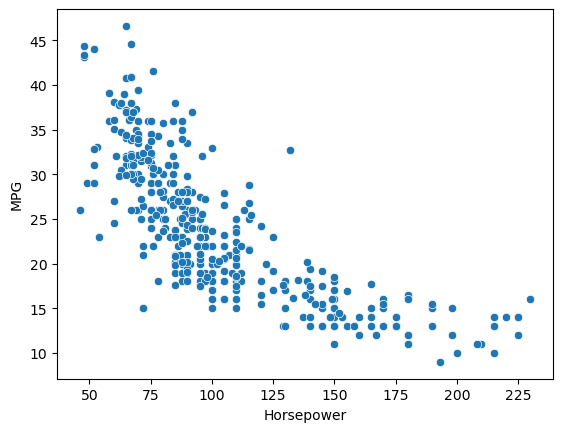

In [6]:
sns.scatterplot(data = raw_dataset, x = 'Horsepower', y = 'MPG')

In [7]:
X

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: Horsepower, Length: 398, dtype: float64

In [8]:
X.shape

(398,)

In [9]:
y.shape

(398,)

#### Problem 1

Make X a `torch.tensor` and y the same.  Be sure to use the correct datatype.

In [10]:
X = raw_dataset['Horsepower']
y = raw_dataset['MPG']

In [11]:
mask = X.notna()
X = X[mask]
y = y[mask]

In [12]:
# Convert to torch tensors with float32 datatype
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

In [13]:
print("Problem 1 - Tensor shapes:")
print(f"X shape: {X.shape}, dtype: {X.dtype}")
print(f"y shape: {y.shape}, dtype: {y.dtype}")

Problem 1 - Tensor shapes:
X shape: torch.Size([396]), dtype: torch.float32
y shape: torch.Size([396]), dtype: torch.float32


#### Problem 2

Create a basic model using:

-  `nn.Linear`
- `nn.Sequential`
- `nn.ReLU`

with one hidden layer consisting of 100 neurons.  Assign the model as `reg_model_1` below.

In [14]:
reg_model_1 = nn.Sequential(
    nn.Linear(1, 100),      # Input 1 -> 100 
    nn.ReLU(),              # Activation
    nn.Linear(100, 1)       # Output 100 -> 1 
)

In [15]:
print(reg_model_1)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


#### Problem 3

Use `nn.MSELoss()` to create a variable `loss_fn` below.

In [16]:
loss_fn = nn.MSELoss()

In [17]:
print(f"Loss function: {loss_fn}")

Loss function: MSELoss()


#### Problem 4

Use `optim.SGD` to create a variable `optimizer` below.  Be sure to pass the `reg_model_1.parameters()` as an argument and use `lr = 0.01`.

In [18]:
optimizer = optim.SGD(reg_model_1.parameters(), lr=0.01)

In [19]:
print(f"Optimizer: {optimizer}")

Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


#### Problem 5

Uncomment the code below to train your model and plot the resulting loss.  Did the model do well?

In [20]:
losses = []
for epoch in range(100):
    yhat = reg_model_1(X.unsqueeze(1))
    loss = loss_fn(y.unsqueeze(1), yhat)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

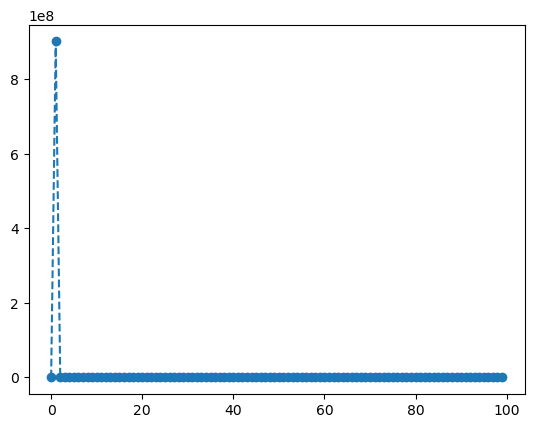

In [21]:
plt.plot(losses, '--o')

In [22]:
print(f"Final loss: {losses[-1]:.4f}")

Final loss: 5855.7432


#### Problem 6

A more complex model as `model2`.

- 3 layers with 128, 64, and 32 neurons in each layer
- Using all the features

Does this model perform better?  How do you know?

In [23]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [24]:
X = raw_dataset.drop('MPG', axis = 1)
mask = X.notna().all(axis=1)
X = X[mask]
X = torch.tensor(X.values, dtype = torch.float32)
y = raw_dataset['MPG'][mask]
y = torch.tensor(y.values, dtype=torch.float32)

In [25]:
X

tensor([[   8.0000,  307.0000,  130.0000, 3504.0000,   12.0000,   70.0000],
        [   8.0000,  350.0000,  165.0000, 3693.0000,   11.5000,   70.0000],
        [   8.0000,  318.0000,  150.0000, 3436.0000,   11.0000,   70.0000],
        ...,
        [   4.0000,  135.0000,   84.0000, 2295.0000,   11.6000,   82.0000],
        [   4.0000,  120.0000,   79.0000, 2625.0000,   18.6000,   82.0000],
        [   4.0000,  119.0000,   82.0000, 2720.0000,   19.4000,   82.0000]])

In [26]:
#scaling the data
X = (X - X.mean())/X.std()
X.shape

torch.Size([396, 6])

In [27]:
#add your layers here
model2 = nn.Sequential(
    nn.Linear(6, 128),      # Input: 6  -> 128 
    nn.ReLU(),
    nn.Linear(128, 64),     # 128 -> 64 
    nn.ReLU(),
    nn.Linear(64, 32),      # 64 -> 32 
    nn.ReLU(),
    nn.Linear(32, 1)        # 32 -> 1 output
)

In [28]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

In [29]:
losses = []
for epoch in range(300):
  yhat = model2(X)
  loss = loss_fn(y.unsqueeze(1), yhat)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

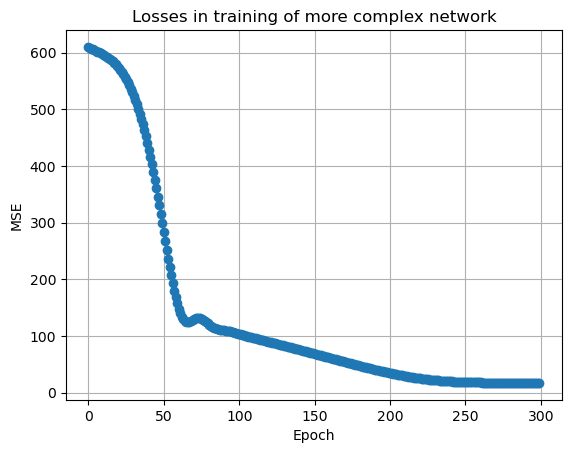

In [30]:
plt.plot(losses, '--o')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Losses in training of more complex network');

#### Image classification

Below we use the [CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.  Consult the documentation to learn more about the data.  To start, the images have to be converted to tensors, and scaled.  This is done using `pytorch` transforms and the `Compose` object to combine `ToTensor` and `Standardize`.

Essentially, this transforms an image into a tensor and scales it.  `Compose` can be used to add a variety of transformations on an image prior to training the model.  We will discuss this more next week however for now it is important to understand that `pytorch` allows you to pass this as an argument when you create a dataset.

In [31]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor, Normalize, Compose

In [32]:
transforms = Compose([ToTensor(), Normalize(mean = (0.5, 0.5, 0.5),  std = (0.5, 0.5, 0.5))])

In [33]:
train_data = CIFAR10(root = '.', download = True, transform=transforms)

In [34]:
#each object is an image as a tensor and a label
train_data[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

To simplify things, we convert the dataset to a binary classification problem involving strictly airplanes and cars.  

In [35]:
#binarization
labels = {0:0, 1:1}
names = ['airplane', 'car']
cifar_binary = [(im, labels[label]) for im, label in train_data if label in [0, 1]]


In [36]:
cifar_binary[0][0].shape

torch.Size([3, 32, 32])

##### Batches of Data

Because the data is large and the network a bit more complicated, we will train the model on small "batches" of data that are created using the `DataLoader` object in `pytorch`.  This will speed up training and is a typical approach to training a neural network.

In [37]:
from torch.utils.data import DataLoader, Dataset

In [38]:
train_loader = DataLoader(cifar_binary, batch_size = 64)

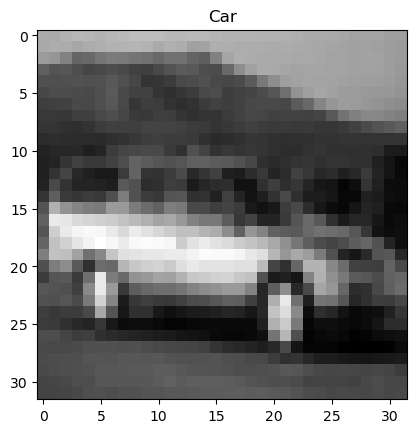

In [39]:
plt.imshow(cifar_binary[0][0][0], cmap = 'gray')
plt.title('Car');

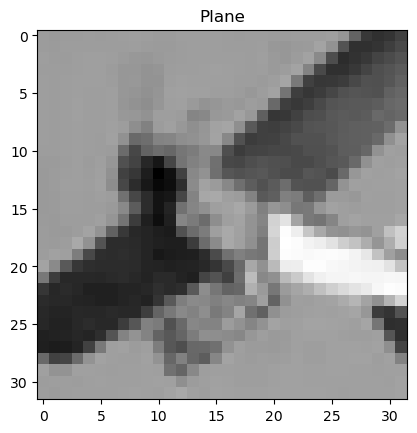

In [40]:
plt.imshow(cifar_binary[100][0][0], cmap = 'gray')
plt.title('Plane');

#### `nn.Flatten`

As we have done in class, we flatten the images prior to feeding them into the network.  `pytorch` offers a layer that will do this for us.  In this example, the images are actually color images and have three pixels.  Accordingly we need to flatten across all these images.  We will discuss this in class but for now recognize that the `0,2` represent the start and stop of which dimensions to flatten across.  

In [41]:
flattener = nn.Flatten( 0, 2)
flattener(cifar_binary[0][0]).shape

torch.Size([3072])

In the actual data, the first dimension will represent how much data is in each batch.  Thus, the model below uses `1,3` to flatten each indiviual 3 channel image into one.

In [42]:
model = nn.Sequential(nn.Flatten(1, 3),
                      nn.Linear(3072, 1000),
                      nn.ReLU(),
                      nn.Linear(1000, 500),
                      nn.ReLU(),
                      nn.Linear(500, 1),
                      nn.Sigmoid())

In [43]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

### Problem 7

Train the model by running the code below.  Add a comment above each line to explain what is happening at each step.  How is the model at predicting cars or planes?

In [44]:
# Initialize loss list
losses = []
# Train for 20 epochs
for epoch in range(20):
    # Loop through batches
    for X, y in train_loader:
      # Forward pass
      yhat = model(X)
      # Compute loss
      loss = loss_fn(yhat,  y.float().unsqueeze(1))
      # Zero gradients
      optimizer.zero_grad()
      # Backward pass
      loss.backward()
      # Update weights
      optimizer.step()
    # Store epoch loss
    losses.append(loss.item())

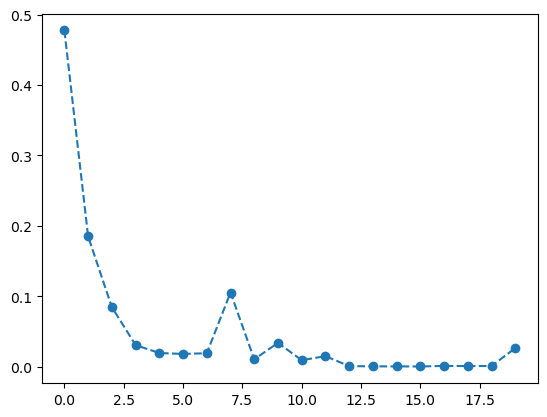

In [45]:
# # Plot training loss
plt.plot(losses, '--o')

In [46]:
# Evaluate model performance
model.eval()
car_correct = 0
car_total = 0
plane_correct = 0
plane_total = 0

with torch.no_grad():
    for X, y in train_loader:
        yhat = model(X)
        predicted = (yhat >= 0.5).float()

        # Count predictions for cars
        car_mask = (y == 0)
        car_correct += ((predicted.squeeze() == 0) & car_mask).sum().item()
        car_total += car_mask.sum().item()

        # Count predictions for airplanes 
        plane_mask = (y == 1)
        plane_correct += ((predicted.squeeze() == 1) & plane_mask).sum().item()
        plane_total += plane_mask.sum().item()

car_accuracy = car_correct / car_total * 100 if car_total > 0 else 0
plane_accuracy = plane_correct / plane_total * 100 if plane_total > 0 else 0

print(f"Car prediction accuracy: {car_accuracy:.2f}% ({car_correct}/{car_total})")
print(f"Airplane prediction accuracy: {plane_accuracy:.2f}% ({plane_correct}/{plane_total})")


Car prediction accuracy: 98.82% (4941/5000)
Airplane prediction accuracy: 98.98% (4949/5000)


The prediction results clearly demonstrate that the model has a high accuracy rate in predicting both cars and airplanes. However, overall, its ability to predict airplanes is slightly better than its ability to predict cars.

### Problem 8

What is a topic in artificial intelligence relevant to your discipline?  Can you find an example library built with `pytorch` or pretrained model in either [torch hub](https://pytorch.org/hub/) or [huggingface](https://huggingface.co/models) that could be useful in your final project?

I think computer vision is a really important topic in AI, especially for computer science students.Computer vision lets computers understand and analyze images and videos, which is useful for things like self-driving cars, medical image analysis, quality control in factories, and security systems.Since I'm studying computer science, this topic is very relevant to what I might work on in the future.

For an example, I found ResNet-50, which is a pretrained model that was trained on the ImageNet dataset.It's available on PyTorch Hub at https://pytorch.org/hub/pytorch_vision_resnet/ and also on Hugging Face at https://huggingface.co/microsoft/resnet-50.


In [47]:
# use ResNet-50 from PyTorch Hub
import torch
from torchvision import models, transforms
from PIL import Image
import requests

In [48]:
# Load pretrained ResNet-50 model
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.eval()

Using cache found in C:\Users\ADMIN/.cache\torch\hub\pytorch_vision_v0.10.0
d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [49]:
# Define image preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

This model would be really useful for my final project because I can take this already trained model and fine-tune it on my own dataset instead of training everything from scratch. This saves a lot of time and computer power. ResNet-50 works well for different kinds of image tasks, and I could even use it as a starting point for more advanced tasks like object detection if I want to expand my project later.